In [1]:
import os
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# base directory for logs
logs_dir = '../embeddings/PBMC_CITEseq/'
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'VAE':
            # save log data
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Loss curve': log_data['elbo_train'].values
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)


Processing Q0.464_rep0: 100%|██████████| 32/32 [00:00<00:00, 23493.39it/s]


<Figure size 432x288 with 0 Axes>

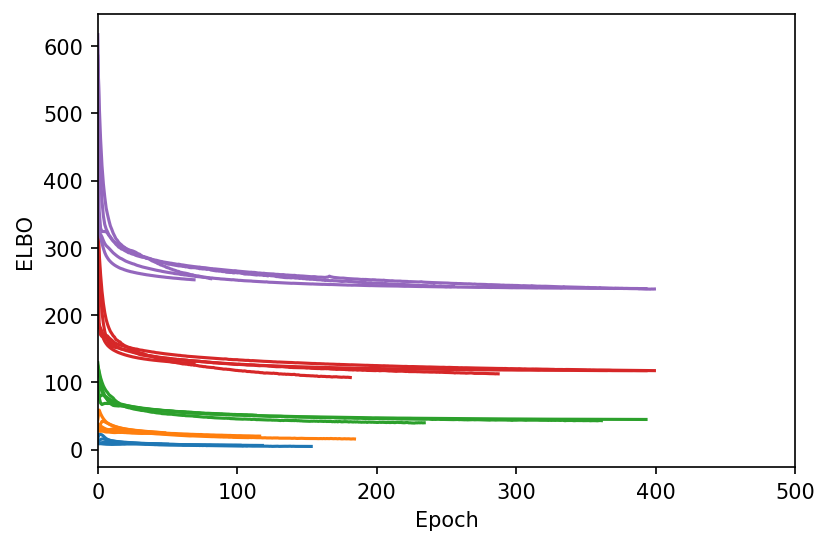

In [3]:
plt.clf()
fig = plt.figure(figsize=(6, 4), dpi=150)
qualities = logs_df['Quality'].unique()
colors = sns.color_palette('tab10', n_colors=len(qualities))
for row in logs_df.iterrows():
    plt.plot(row[1]['Loss curve'], 
             color=colors[qualities.tolist().index(row[1]['Quality'])],
             label=row[1]['Quality'])
plt.xlim(0, 500)
# plt.legend()
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.show()

In [4]:
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'nanoTxformer':
            # save log data
            print(log_data)
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Loss curve': log_data['train_losses']
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)

Processing Q0.001_rep0: 100%|██████████| 32/32 [00:00<00:00, 12160.71it/s]


{'train_losses': [7.742191314697266, 7.746022939682007, 7.746769666671753, 7.739310026168823, 7.741387605667114, 7.73694920539856, 7.743812084197998, 7.740583658218384, 7.740344047546387, 7.73420524597168, 7.736064434051514, 7.732244968414307, 7.734150648117065, 7.728650331497192, 7.723749399185181, 7.723559141159058, 7.725661277770996, 7.72110390663147, 7.715075492858887, 7.716588735580444, 7.707324028015137, 7.707210063934326, 7.704281330108643, 7.703392028808594, 7.699286460876465, 7.694116830825806, 7.690465450286865, 7.684422731399536, 7.675593852996826, 7.6761791706085205, 7.670721769332886, 7.6606080532073975, 7.661801815032959, 7.656348943710327, 7.649268865585327, 7.644466876983643, 7.639487266540527, 7.635365009307861, 7.623133659362793, 7.618659496307373, 7.609486103057861, 7.606276273727417, 7.600225448608398, 7.5908403396606445, 7.589044094085693, 7.579352617263794, 7.572933673858643, 7.564647436141968, 7.554314613342285, 7.546910285949707, 7.54209041595459, 7.531104564666

Processing Q0.005_rep0: 100%|██████████| 32/32 [00:00<00:00, 12523.82it/s]


{'train_losses': [6.570432424545288, 6.572357416152954, 6.567858695983887, 6.571515321731567, 6.571276903152466, 6.568828344345093, 6.568467855453491, 6.5674965381622314, 6.562540769577026, 6.56524658203125, 6.562229871749878, 6.564108371734619, 6.561046123504639, 6.5577826499938965, 6.554947853088379, 6.5530900955200195, 6.5520405769348145, 6.552844762802124, 6.541496992111206, 6.542869567871094, 6.537745475769043, 6.532229900360107, 6.530561923980713, 6.522920370101929, 6.524613380432129, 6.520666122436523, 6.515294790267944, 6.513564825057983, 6.50745701789856, 6.502407550811768, 6.4975481033325195, 6.48949408531189, 6.484940052032471, 6.481785774230957, 6.477813720703125, 6.475236654281616, 6.46523642539978, 6.459314346313477, 6.453960657119751, 6.447700500488281, 6.439580678939819, 6.432920217514038, 6.428722143173218, 6.417647361755371, 6.413786172866821, 6.408961772918701, 6.402451992034912, 6.388558387756348, 6.382079839706421, 6.378052473068237, 6.368009805679321, 6.3560857772

Processing Q0.022_rep0: 100%|██████████| 32/32 [00:00<00:00, 12424.12it/s]


{'train_losses': [6.129997491836548, 6.124319314956665, 6.127103567123413, 6.124647617340088, 6.13012433052063, 6.126952886581421, 6.125061988830566, 6.121325731277466, 6.121595144271851, 6.122381210327148, 6.11795973777771, 6.117096424102783, 6.118134498596191, 6.119234323501587, 6.107281684875488, 6.107892036437988, 6.104854583740234, 6.104145050048828, 6.0969953536987305, 6.0973029136657715, 6.097458839416504, 6.089303016662598, 6.094353675842285, 6.084197044372559, 6.082743167877197, 6.073735237121582, 6.074359655380249, 6.066835165023804, 6.060916423797607, 6.060233116149902, 6.057376146316528, 6.05003023147583, 6.044260025024414, 6.0357115268707275, 6.0356340408325195, 6.02924919128418, 6.028632640838623, 6.017011404037476, 6.011733531951904, 6.002294540405273, 5.994640827178955, 5.991100311279297, 5.979957580566406, 5.977738857269287, 5.970091342926025, 5.960333824157715, 5.951356649398804, 5.950373888015747, 5.933310270309448, 5.934942245483398, 5.9209630489349365, 5.9188897609

Processing Q0.100_rep0: 100%|██████████| 32/32 [00:00<00:00, 10563.33it/s]


{'train_losses': [7.207233428955078, 7.210420370101929, 7.214900493621826, 7.21087646484375, 7.206550121307373, 7.208019971847534, 7.20806622505188, 7.209330320358276, 7.19985032081604, 7.211047649383545, 7.208504676818848, 7.204034090042114, 7.195859432220459, 7.200416564941406, 7.191595077514648, 7.194845914840698, 7.190763235092163, 7.1892828941345215, 7.185112237930298, 7.185537099838257, 7.181269407272339, 7.172869682312012, 7.172752141952515, 7.169050216674805, 7.15942120552063, 7.1661152839660645, 7.155309438705444, 7.1567065715789795, 7.151665449142456, 7.149924993515015, 7.137909650802612, 7.138231515884399, 7.131771087646484, 7.121197938919067, 7.12287449836731, 7.118816137313843, 7.113672971725464, 7.106814861297607, 7.097113847732544, 7.0912792682647705, 7.087727308273315, 7.079008340835571, 7.077130317687988, 7.069715261459351, 7.0604894161224365, 7.053372859954834, 7.049357175827026, 7.039815664291382, 7.029871463775635, 7.026220083236694, 7.014033317565918, 7.01164960861

Processing Q0.464_rep0: 100%|██████████| 32/32 [00:00<00:00, 13052.39it/s]

{'train_losses': [6.261467695236206, 6.261108875274658, 6.2669312953948975, 6.266931533813477, 6.263488054275513, 6.26828145980835, 6.260295391082764, 6.256473779678345, 6.2644431591033936, 6.249752759933472, 6.255794286727905, 6.259051322937012, 6.252975940704346, 6.251974821090698, 6.252759218215942, 6.246896982192993, 6.242756605148315, 6.237961053848267, 6.239444971084595, 6.235987424850464, 6.234921455383301, 6.228919267654419, 6.227577209472656, 6.223592758178711, 6.221899747848511, 6.226644992828369, 6.216514587402344, 6.206634759902954, 6.207947731018066, 6.196033477783203, 6.198928117752075, 6.189327955245972, 6.1870949268341064, 6.184581995010376, 6.1970391273498535, 6.170291423797607, 6.171955347061157, 6.16700291633606, 6.154314041137695, 6.1517956256866455, 6.152423143386841, 6.147062301635742, 6.135628700256348, 6.132955312728882, 6.114917993545532, 6.110563516616821, 6.1088502407073975, 6.103724241256714, 6.0923912525177, 6.087194204330444, 6.083531856536865, 6.073128223

<Figure size 432x288 with 0 Axes>

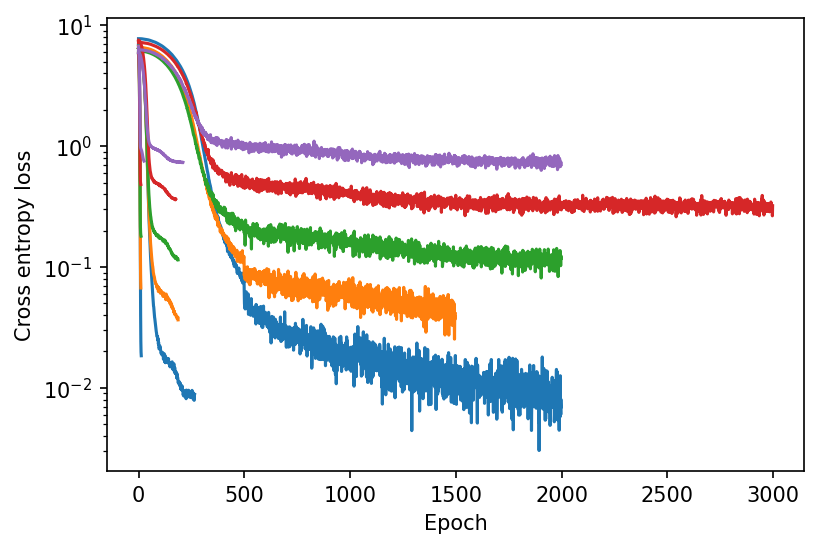

In [5]:
plt.clf()
fig = plt.figure(figsize=(6, 4), dpi=150)
qualities = logs_df['Quality'].unique()
colors = sns.color_palette('tab10', n_colors=len(qualities))
for row in logs_df.iterrows():
    plt.plot(row[1]['Loss curve'], 
             color=colors[qualities.tolist().index(row[1]['Quality'])],
             label=row[1]['Quality'])
# plt.legend()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Cross entropy loss')
plt.show()

In [6]:
logs = []

# loop through quality and replicate subdirectories
for quality_dir in os.listdir(logs_dir):
    quality_path = os.path.join(logs_dir, quality_dir)
    if not os.path.isdir(quality_path):
        continue

    # loop through log files
    for file in tqdm(os.listdir(quality_path), desc=f"Processing {quality_dir}"):
        if not file.endswith('_log.pkl'):
            continue

        # extract method and fraction from filename
        method, frac, _ = file.split('_')
        frac = frac[4:]

        # load log
        log_path = os.path.join(quality_path, file)
        with open(log_path, 'rb') as f:
            log_data = pickle.load(f)

        if method == 'PCA':
            # save log data
            print(log_data)
            logs.append({
                'Quality': quality_dir.split('_')[0],
                'Replicate': quality_dir.split('_')[1],
                'Fraction': float(frac),
                'Method': method,
                'Variance explained': log_data['variance_explained']
            })

# convert to DataFrame and save
logs_df = pd.DataFrame(logs)

Processing Q0.001_rep0: 100%|██████████| 32/32 [00:00<00:00, 10631.95it/s]


{'variance_explained': 0.8154659850383206}
{'variance_explained': 0.7712297430129904}
{'variance_explained': 0.7508566777086276}
{'variance_explained': 0.7546969871439547}
{'variance_explained': 0.7504471610076722}


Processing Q0.005_rep0: 100%|██████████| 32/32 [00:00<00:00, 13509.59it/s]


{'variance_explained': 0.6846275746593127}
{'variance_explained': 0.5816517800154395}
{'variance_explained': 0.567931840003301}
{'variance_explained': 0.5622243586588369}
{'variance_explained': 0.5616156091626014}


Processing Q0.022_rep0: 100%|██████████| 32/32 [00:00<00:00, 13311.29it/s]


{'variance_explained': 0.6047969070977283}
{'variance_explained': 0.48861050084722174}
{'variance_explained': 0.4675449853786538}
{'variance_explained': 0.46541683644765763}
{'variance_explained': 0.466159611425027}


Processing Q0.100_rep0: 100%|██████████| 32/32 [00:00<00:00, 12473.77it/s]


{'variance_explained': 0.5885366551533776}
{'variance_explained': 0.4813224786398448}
{'variance_explained': 0.47035871209673014}
{'variance_explained': 0.4605279033608852}
{'variance_explained': 0.4610741070843546}


Processing Q0.464_rep0: 100%|██████████| 32/32 [00:00<00:00, 14067.47it/s]

{'variance_explained': 0.6826061111213025}
{'variance_explained': 0.6071078906794128}
{'variance_explained': 0.5970445940787247}
{'variance_explained': 0.5910154041665436}
{'variance_explained': 0.5908213957096837}


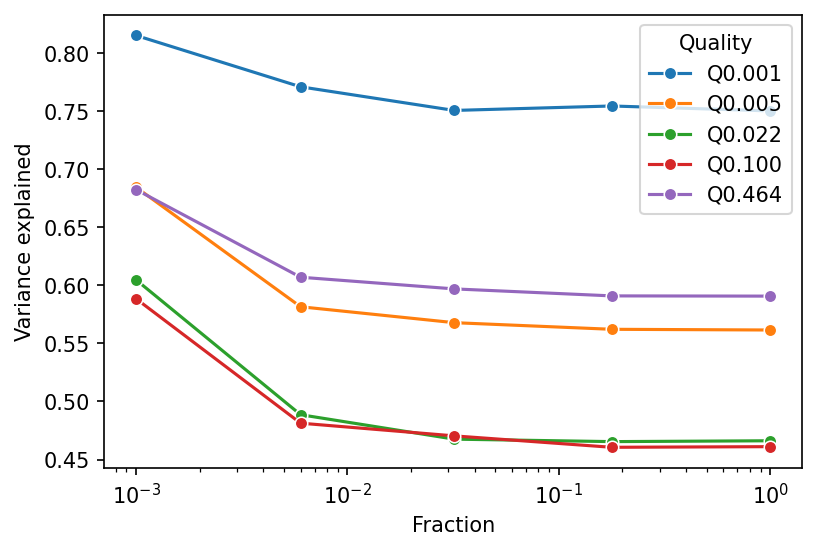

In [7]:
plt.figure(figsize=(6, 4), dpi=150)
sns.lineplot(logs_df, x='Fraction', y='Variance explained', 
             hue='Quality', marker='o')
plt.xscale('log')